# Philippines Country

In [1]:
import pandas as pd
from pathlib import Path
import datetime

import math
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
from statsmodels.tsa import tsatools, stattools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics import tsaplots

from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
menhap_df = pd.read_excel("D:/PENS/Semester_4/Data Mining/PBL_Datamining/final_data.xlsx")
menhap_df

,country,year,Schizophrenia,Bipolar,Eating_Disorders,Anxiety,Drug_Use,Depression,Alcohol_Use,Life_Ladder,Log_GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Generosity,Corruption,Positive_Affect,Negative_Affect,Ladder_Std_Dev,GINI_Index
0,Brunei,1990,0.274544,0.617719,0.550731,3.548453,0.911231,2.577977,0.771017,6.233732,10.826301,0.790585,70.994705,0.767580,0.073472,0.062403,0.569497,0.166263,2.052102,0.622453
1,Brunei,1991,0.273819,0.618347,0.548010,3.554565,0.910156,2.562828,0.770862,6.437663,11.145486,0.793567,73.141360,0.789073,0.054550,0.226984,0.550824,0.112444,2.006036,0.584078
2,Brunei,1992,0.273212,0.618986,0.545544,3.561621,0.910287,2.551382,0.770430,6.586561,10.776199,0.823234,73.563922,0.787172,0.043634,0.148619,0.712836,0.185052,2.053332,0.560275
3,Brunei,1993,0.272736,0.619673,0.543644,3.569155,0.910409,2.543804,0.769584,6.821280,11.119712,0.811811,71.970894,0.801130,0.071169,0.054491,0.472039,0.127140,2.031076,0.612157
4,Brunei,1994,0.272383,0.620342,0.542626,3.576319,0.908915,2.538465,0.768343,6.192638,10.400065,0.752147,73.270498,0.705897,0.086336,0.107812,0.650715,0.138546,2.073008,0.559053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,Vietnam,2013,0.241026,0.550479,0.119353,2.039645,0.673579,2.884934,1.722689,5.022699,8.541249,0.759477,65.545815,0.919607,-0.024637,0.771246,0.718431,0.165225,1.404304,0.381849
304,Vietnam,2014,0.241883,0.551005,0.121583,2.045305,0.677829,2.882767,1.728448,5.084923,8.588622,0.792168,65.677925,0.845240,0.002126,0.779896,0.701386,0.240607,1.769163,0.414816
305,Vietnam,2015,0.242783,0.551548,0.123609,2.051937,0.682933,2.881750,1.733233,5.076315,8.642591,0.848677,65.810028,0.897333,0.087220,0.747188,0.642237,0.232416,1.794858,0.398138
306,Vietnam,2016,0.243709,0.552084,0.126256,2.059037,0.687896,2.879813,1.736929,5.062267,8.692120,0.876324,65.942139,0.894351,-0.088430,0.799240,0.536226,0.222550,1.767819,0.375812


In [3]:
menhap_df.dtypes

country                object
year                    int64
Schizophrenia         float64
Bipolar               float64
Eating_Disorders      float64
Anxiety               float64
Drug_Use              float64
Depression            float64
Alcohol_Use           float64
Life_Ladder           float64
Log_GDP_per_Capita    float64
Social_Support        float64
Life_Expectancy       float64
Freedom               float64
Generosity            float64
Corruption            float64
Positive_Affect       float64
Negative_Affect       float64
Ladder_Std_Dev        float64
GINI_Index            float64
dtype: object

In [4]:
lifeladder_df = menhap_df.loc[:, ["year", 'country', 'Life_Ladder']]
lifeladder_df

,year,country,Life_Ladder
0,1990,Brunei,6.233732
1,1991,Brunei,6.437663
2,1992,Brunei,6.586561
3,1993,Brunei,6.821280
4,1994,Brunei,6.192638
...,...,...,...
303,2013,Vietnam,5.022699
304,2014,Vietnam,5.084923
305,2015,Vietnam,5.076315
306,2016,Vietnam,5.062267


In [5]:
# Mengambil data untuk country tertentu
philip_df = lifeladder_df.loc[lifeladder_df['country'] == 'Philippines']
philip_df['year'] = pd.to_datetime(philip_df['year'], format='%Y')
philip_df = pd.Series(philip_df['Life_Ladder'].values, index=philip_df.year, name='Life_Ladder')
philip_df.index = pd.DatetimeIndex(philip_df.index, 
                                      freq=philip_df.index.inferred_freq)

philip_df

C:\Users\DELL\AppData\Local\Temp\ipykernel_768\235152270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  philip_df['year'] = pd.to_datetime(philip_df['year'], format='%Y')


year
1990-01-01    4.950100
1991-01-01    5.183661
1992-01-01    4.820510
1993-01-01    5.009845
1994-01-01    4.696847
1995-01-01    4.972031
1996-01-01    5.057379
1997-01-01    4.679629
1998-01-01    4.920450
1999-01-01    4.752041
2000-01-01    5.334315
2001-01-01    5.102990
2002-01-01    4.987337
2003-01-01    5.070260
2004-01-01    4.760186
2005-01-01    5.141491
2006-01-01    4.669946
2007-01-01    5.073562
2008-01-01    4.589065
2009-01-01    4.879911
2010-01-01    4.941514
2011-01-01    4.993957
2012-01-01    5.001965
2013-01-01    4.976925
2014-01-01    5.312550
2015-01-01    5.547489
2016-01-01    5.430833
2017-01-01    5.101861
Freq: AS-JAN, Name: Life_Ladder, dtype: float64

In [6]:
philip_list = philip_df.tolist()
philip_list

[4.950100070647017,
 5.183661443060448,
 4.820510323153565,
 5.009845067873325,
 4.696847230955801,
 4.972031016819311,
 5.057379171749286,
 4.679629243202102,
 4.920450347890664,
 4.752040533263443,
 5.334314879540661,
 5.102989532019632,
 4.987336596729881,
 5.070259659740178,
 4.760186003788058,
 5.141491396777792,
 4.66994571685791,
 5.073562145233154,
 4.589065074920654,
 4.879910945892334,
 4.941514015197754,
 4.993956565856934,
 5.001965045928955,
 4.976925373077393,
 5.312550067901611,
 5.547489166259766,
 5.430832862854004,
 5.101861429512904]

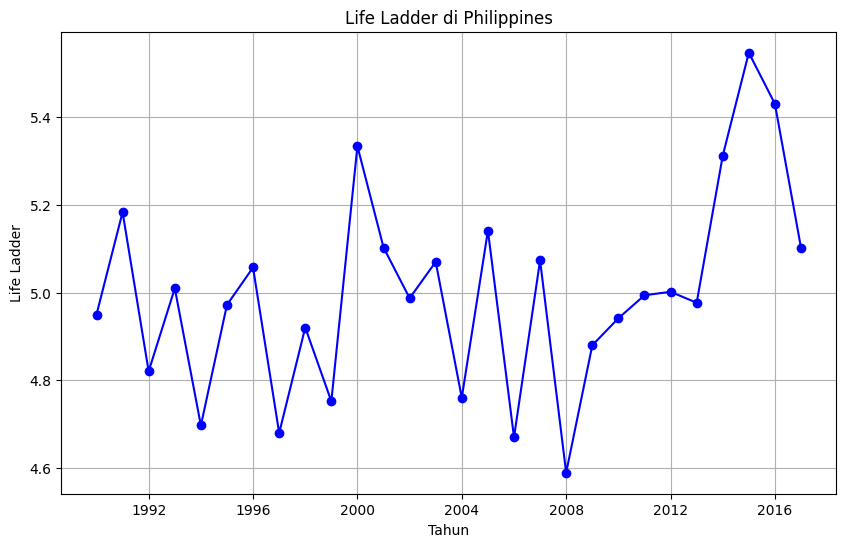

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(philip_df.index, philip_list, marker='o', linestyle='-', color='b')
plt.title('Life Ladder di Philippines')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.grid(True)
plt.show()

### model SES

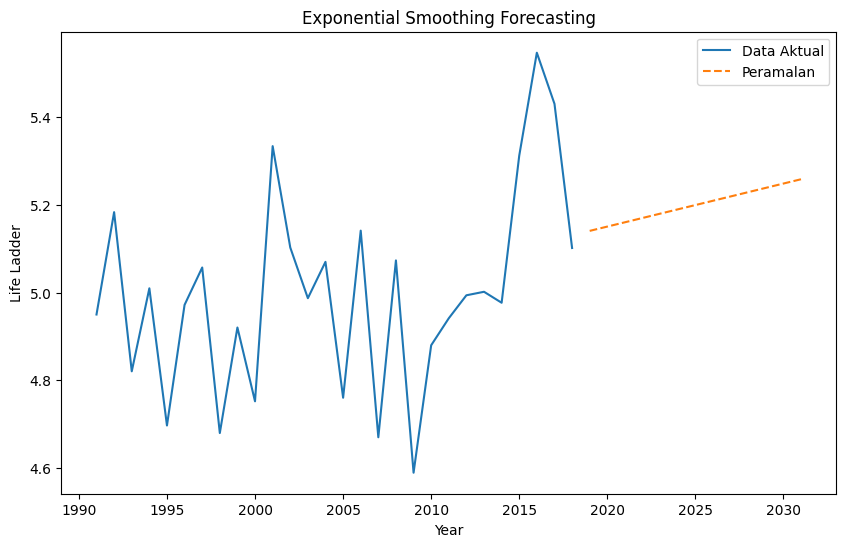

            forecast
2018-12-31  5.140931
2019-12-31  5.150753
2020-12-31  5.160574
2021-12-31  5.170395
2022-12-31  5.180216
2023-12-31  5.190038
2024-12-31  5.199859
2025-12-31  5.209680
2026-12-31  5.219501
2027-12-31  5.229323
2028-12-31  5.239144
2029-12-31  5.248965
2030-12-31  5.258786


In [8]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(philip_list), freq='Y')
life_ladder_series = pd.Series(philip_list, index=years)

# Buat model Exponential Smoothing
model = ExponentialSmoothing(life_ladder_series, trend='add', seasonal=None, seasonal_periods=None)
fit = model.fit()

# Buat prediksi untuk beberapa tahun ke depan
forecast_steps = 13
forecast = fit.forecast(steps=forecast_steps)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(forecast, label='Peramalan', linestyle='--')
plt.legend(loc='best')
plt.title('Exponential Smoothing Forecasting')
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.show()

# Tampilkan DataFrame hasil peramalan
forecast_years = pd.date_range(start=years[-1] + pd.offsets.YearBegin(), periods=forecast_steps, freq='Y')
forecast_df = pd.DataFrame({'forecast': forecast})

print(forecast_df)


### Moving Average

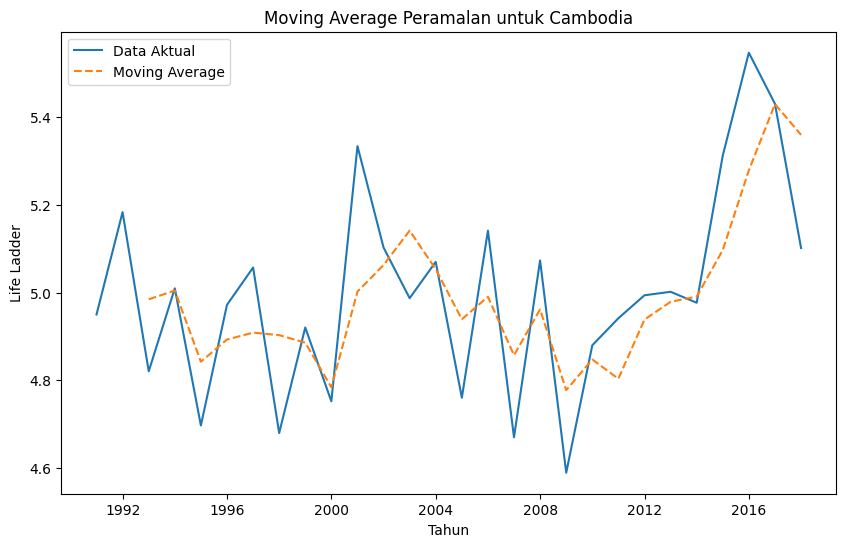

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(philip_list), freq='Y')
life_ladder_series = pd.Series(philip_list, index=years)

# Hitung Moving Average (misalnya dengan jendela waktu 3 tahun)
window_size = 3
moving_average = life_ladder_series.rolling(window=window_size).mean()

# Plot hasilnya
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(moving_average, label='Moving Average', linestyle='--')
plt.legend(loc='best')
plt.title('Moving Average Peramalan untuk Cambodia')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.show()

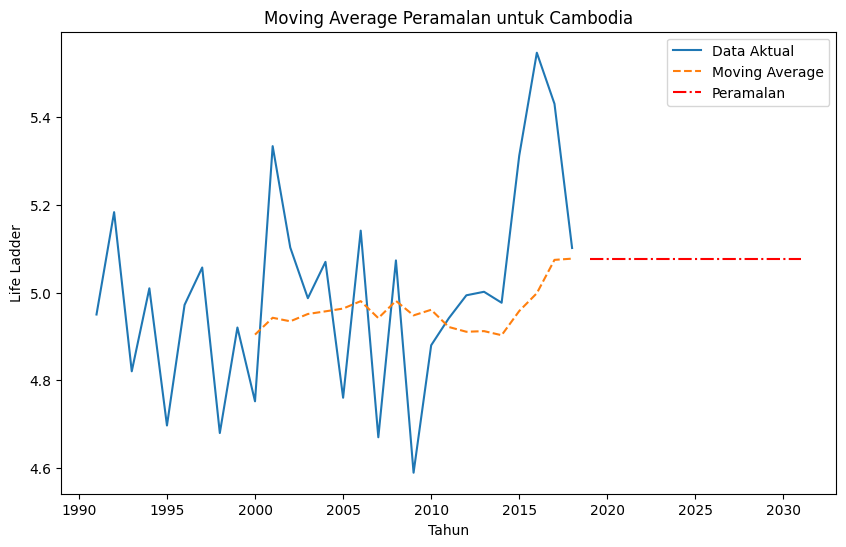

            forecast
year                
2018-12-31  5.077607
2019-12-31  5.077607
2020-12-31  5.077607
2021-12-31  5.077607
2022-12-31  5.077607
2023-12-31  5.077607
2024-12-31  5.077607
2025-12-31  5.077607
2026-12-31  5.077607
2027-12-31  5.077607
2028-12-31  5.077607
2029-12-31  5.077607
2030-12-31  5.077607


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Life Ladder
years = pd.date_range(start='1990', periods=len(philip_list), freq='Y')
life_ladder_series = pd.Series(philip_list, index=years)

# Hitung Moving Average (misalnya dengan jendela waktu 10 tahun)
window_size = 10
moving_average = life_ladder_series.rolling(window=window_size).mean()

# Prediksi 10 tahun ke depan
last_moving_avg = moving_average.iloc[-1]
forecast_years = pd.date_range(start=life_ladder_series.index[-1] + pd.DateOffset(years=1), periods=13, freq='Y')
forecast_values = np.full(13, last_moving_avg)

# Buat DataFrame untuk prediksi
forecast_ma = pd.DataFrame({'year': forecast_years, 'forecast': forecast_values})
forecast_ma.set_index('year', inplace=True)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(life_ladder_series, label='Data Aktual')
plt.plot(moving_average, label='Moving Average', linestyle='--')
plt.plot(forecast_ma, label='Peramalan', linestyle='-.', color='red')
plt.legend(loc='best')
plt.title('Moving Average Peramalan untuk Cambodia')
plt.xlabel('Tahun')
plt.ylabel('Life Ladder')
plt.show()

# Tampilkan DataFrame hasil peramalan
print(forecast_ma)

### linear regresion

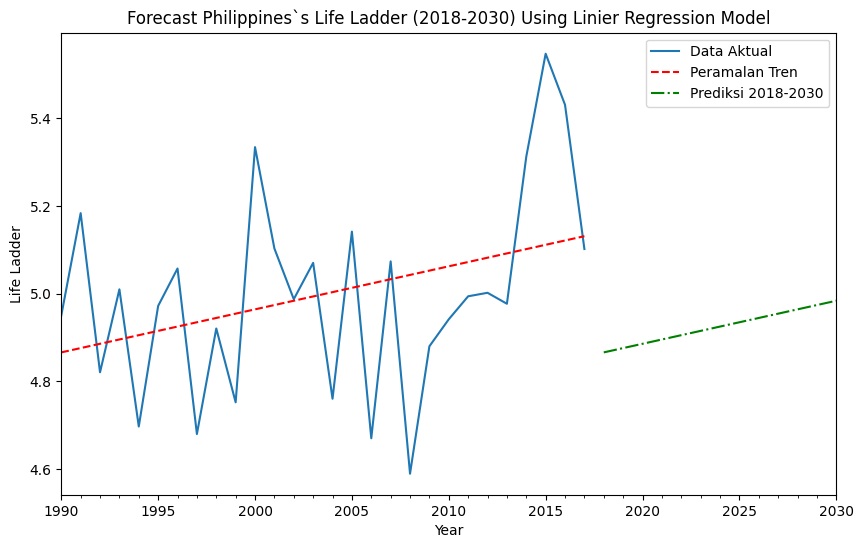

2018-12-31    4.865936
2019-12-31    4.875758
2020-12-31    4.885579
2021-12-31    4.895400
2022-12-31    4.905221
2023-12-31    4.915043
2024-12-31    4.924864
2025-12-31    4.934685
2026-12-31    4.944506
2027-12-31    4.954328
2028-12-31    4.964149
2029-12-31    4.973970
2030-12-31    4.983791
Freq: A-DEC, dtype: float64


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa import tsatools

# Membuat data Life Ladder dari daftar yang ada
years = pd.date_range(start='1990', periods=len(philip_list), freq='Y')
life_ladder_series = pd.Series(philip_list, index=years, name='Life_Ladder')

# Menambahkan tren
philip_df = tsatools.add_trend(life_ladder_series, trend='ct')

# Membangun model regresi linear
philip_lm = sm.OLS(philip_df['Life_Ladder'], philip_df[['trend', 'const']]).fit()

# Membuat data untuk prediksi dari 2018 sampai 2030
forecast_years = pd.date_range(start='2018', end='2031', freq='Y')
forecast_df = pd.DataFrame(index=forecast_years)
forecast_df = tsatools.add_trend(forecast_df, trend='ct')

# Membuat prediksi
forecast_values = philip_lm.predict(forecast_df[['trend', 'const']])

# Plot hasil
plt.figure(figsize=(10, 6))
ax = life_ladder_series.plot(title='Forecast Philippines`s Life Ladder (2018-2030) Using Linier Regression Model')
philip_lm.predict(philip_df[['trend', 'const']]).plot(ax=ax, linestyle='--', color='red')
forecast_values.plot(ax=ax, linestyle='-.', color='green')
ax.set_xlabel('Year')
ax.set_ylabel('Life Ladder')
plt.legend(['Data Aktual', 'Peramalan Tren', 'Prediksi 2018-2030'])
plt.show()

# Menampilkan prediksi

print(forecast_values)

forecast_values.to_excel("D:\PENS\Semester_4\Data Mining\PBL_Datamining\hasil_forecast\philippine_for_lr.xlsx", index=False)

### ARIMA

Forecast for Philippines's Life Ladder (2018-2030):
            forecast
2018-12-31  5.349847
2019-12-31  5.232536
2020-12-31  5.288031
2021-12-31  5.261779
2022-12-31  5.274197
2023-12-31  5.268323
2024-12-31  5.271102
2025-12-31  5.269787
2026-12-31  5.270409
2027-12-31  5.270115
2028-12-31  5.270254
2029-12-31  5.270188
2030-12-31  5.270219


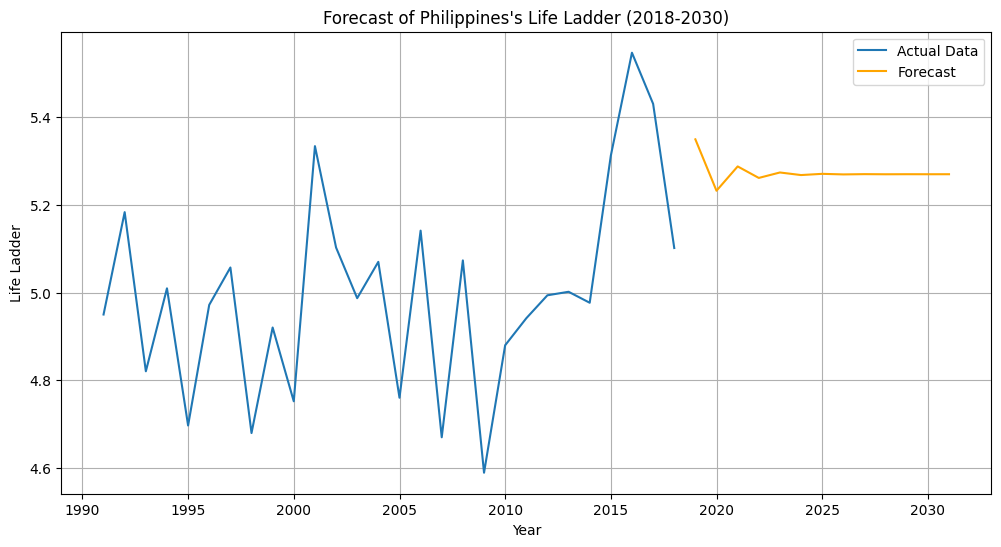

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Konversi life_ladder_list menjadi Series dengan index tahun
years = pd.date_range(start='1990', periods=len(philip_list), freq='Y')
life_ladder_series = pd.Series(philip_list, index=years)

# Misalkan model ARIMA yang sudah kita latih sebelumnya adalah ARIMA(1,1,1)
model = ARIMA(life_ladder_series, order=(1, 1, 1))
model_fit = model.fit()

# Melakukan peramalan untuk 14 tahun ke depan (dari tahun 2018 hingga 2030)
forecast = model_fit.forecast(steps=13)

# Tampilkan hasil peramalan
print("Forecast for Philippines's Life Ladder (2018-2030):")
forecast_years = pd.date_range(start='2018-01-01', periods=13, freq='Y')
forecast_arima = pd.DataFrame({'forecast': forecast})
print(forecast_arima)

# Visualisasikan hasil peramalan
plt.figure(figsize=(12, 6))
plt.plot(life_ladder_series, label='Actual Data')
plt.plot(forecast, label='Forecast', color='orange')
plt.title("Forecast of Philippines's Life Ladder (2018-2030)")
plt.xlabel('Year')
plt.ylabel('Life Ladder')
plt.legend()
plt.grid(True)
plt.show()


## Evaluation Model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Buat DataFrame baru dengan life_ladder_list dan tahun sebagai indeks
philip_df_new = pd.DataFrame({'Life_Ladder': philip_list}, index=years)

# Bagi data menjadi set pelatihan dan pengujian (70:30)
X = philip_df_new.index.year.values.reshape(-1, 1)  # Ambil tahun dari indeks DataFrame
y = philip_df_new['Life_Ladder'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Regresi Linier
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
forecast_lr = model_lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, forecast_lr)
mape_lr = np.mean(np.abs((y_test - forecast_lr) / y_test)) * 100
rmse_lr = np.sqrt(mean_squared_error(y_test, forecast_lr))


In [14]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi set pelatihan dan pengujian (70:30)
X = life_ladder_series.index.to_numpy().reshape(-1, 1)  # Menggunakan tahun sebagai fitur
y = life_ladder_series.values  # Life Ladder sebagai target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model SES
model_ses = ExponentialSmoothing(y_train, trend='add', seasonal=None, seasonal_periods=None)
fit_ses = model_ses.fit()
forecast_ses = fit_ses.forecast(steps=len(X_test))
mae_ses = mean_absolute_error(y_test, forecast_ses)
mape_ses = np.mean(np.abs((y_test - forecast_ses) / y_test)) * 100
rmse_ses = np.sqrt(mean_squared_error(y_test, forecast_ses))

# Model ARIMA
model_arima = ARIMA(y_train, order=(1, 1, 1))
model_fit_arima = model_arima.fit()
forecast_arima = model_fit_arima.forecast(steps=len(X_test))
mae_arima = mean_absolute_error(y_test, forecast_arima)
mape_arima = np.mean(np.abs((y_test - forecast_arima) / y_test)) * 100
rmse_arima = np.sqrt(mean_squared_error(y_test, forecast_arima))

# Model MA
window_size = 3
philip_df['Moving Average'] = philip_df['Life_Ladder'].rolling(window=window_size, min_periods=1).mean()
actual_data = philip_df['Life_Ladder']
ma_forecast = philip_df['Moving Average']
mae_ma = mean_absolute_error(actual_data, ma_forecast)
mape_ma = np.mean(np.abs((actual_data - ma_forecast) / actual_data)) * 100
rmse_ma = np.sqrt(mean_squared_error(actual_data, ma_forecast))


In [15]:
print(forecast_lr)
print(forecast_ses)
print(forecast_arima)
print(ma_forecast.tail(20))
print(philip_list)

[4.94966893 5.06382527 4.94253416 5.03528619 4.88545599 4.97107324
 5.0067471  5.04242096 4.96393847]
[4.95408758 4.95145174 4.94881589 4.94618005 4.9435442  4.94090836
 4.93827251 4.93563667 4.93300082]
[4.9738653  4.98028233 4.97978926 4.97982715 4.97982424 4.97982446
 4.97982444 4.97982445 4.97982445]
1998-12-31    4.885820
1999-12-31    4.784040
2000-12-31    5.002269
2001-12-31    5.063115
2002-12-31    5.141547
2003-12-31    5.053529
2004-12-31    4.939261
2005-12-31    4.990646
2006-12-31    4.857208
2007-12-31    4.961666
2008-12-31    4.777524
2009-12-31    4.847513
2010-12-31    4.803497
2011-12-31    4.938461
2012-12-31    4.979145
2013-12-31    4.990949
2014-12-31    5.097147
2015-12-31    5.278988
2016-12-31    5.430291
2017-12-31    5.360061
Freq: A-DEC, Name: Moving Average, dtype: float64
[4.950100070647017, 5.183661443060448, 4.820510323153565, 5.009845067873325, 4.696847230955801, 4.972031016819311, 5.057379171749286, 4.679629243202102, 4.920450347890664, 4.7520405332

In [16]:
# Buat DataFrame untuk menyimpan hasil evaluasi
eval_metrics = pd.DataFrame({
    'Model': ['SES','Linier Regresion', 'Moving Average', 'ARIMA'],
    'MAE': [mae_ses,mae_lr, mae_ma, mae_arima],
    'MAPE (%)': [mape_ses, mape_lr, mape_ma, mape_arima],
    'RMSE': [rmse_ses, rmse_lr, rmse_ma, rmse_arima]
})

# Tampilkan DataFrame evaluasi
print("Evaluation Metrics:")
print(eval_metrics)

Evaluation Metrics:
              Model       MAE  MAPE (%)      RMSE
0               SES  0.144313  2.768485  0.224343
1  Linier Regresion  0.119104  2.292940  0.184108
2    Moving Average  0.118404  2.366465  0.149426
3             ARIMA  0.126531  2.426261  0.210828


In [17]:

# Data aktual dan prediksi dari masing-masing model
actual_values = [4.879910945892334, 4.941514015197754, 4.993956565856934, 5.001965045928955, 4.976925373077393, 5.312550067901611, 5.547489166259766, 5.430832862854004, 5.101861429512904]
ses_forecast = [4.95408758, 4.95145174, 4.94881589, 4.94618005, 4.9435442,  4.94090836, 4.93827251, 4.93563667, 4.93300082]
ma_forecast = [4.847513, 4.803497, 4.938461, 4.979145, 4.990949, 5.097147, 5.278988, 5.430291, 5.360061]
lr_forecast = [4.94966893, 5.06382527, 4.94253416, 5.03528619, 4.88545599, 4.97107324, 5.0067471,  5.04242096, 4.96393847]
arima_forecast = [4.9738653, 4.98028233, 4.97978926, 4.97982715, 4.97982424, 4.97982446, 4.97982444, 4.97982445, 4.97982445]

# Tanggal mulai dan akhir
start_date = '2009-01-01'
end_date = '2018-01-01'

# Buat range tanggal dari start_date hingga end_date
date_range = pd.date_range(start=start_date, end=end_date, freq='Y')

# Buat DataFrame untuk tabel prediksi dengan kolom tahun
predictions_table = pd.DataFrame({
    'Year': date_range,
    'Actual': actual_values,
    'SES Forecast': forecast_ses,
    'Linier Regresion Forecast' : forecast_lr,
    'MA Forecast': ma_forecast,
    'ARIMA Forecast': forecast_arima
})
# Menampilkan tabel hasil prediksi
print("Hasil Prediksi:")
predictions_table

Hasil Prediksi:


,Year,Actual,SES Forecast,Linier Regresion Forecast,MA Forecast,ARIMA Forecast
0,2009-12-31,4.879911,4.954088,4.949669,4.847513,4.973865
1,2010-12-31,4.941514,4.951452,5.063825,4.803497,4.980282
2,2011-12-31,4.993957,4.948816,4.942534,4.938461,4.979789
3,2012-12-31,5.001965,4.946180,5.035286,4.979145,4.979827
4,2013-12-31,4.976925,4.943544,4.885456,4.990949,4.979824
5,2014-12-31,5.312550,4.940908,4.971073,5.097147,4.979824
6,2015-12-31,5.547489,4.938273,5.006747,5.278988,4.979824
7,2016-12-31,5.430833,4.935637,5.042421,5.430291,4.979824
8,2017-12-31,5.101861,4.933001,4.963938,5.360061,4.979824
